In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus.reader.wordnet import *
import string
import pandas as pd
from sklearn.model_selection import train_test_split
import re
import category_encoders as ce
from sklearn.metrics import classification_report
from textblob import TextBlob

In [2]:
from nltk.corpus import words
stop_words = set(stopwords.words('english'))
wn = nltk.WordNetLemmatizer()
worddict = set(nltk.corpus.words.words())
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def clean_text(text):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split())
def preprocessing(text):
    new_text = clean_text(text.strip())
    tokens = word_tokenize(new_text.lower())
    new_text = " ".join([w for w in tokens if not w in stop_words])
    wordset_n = set(wn.lemmatize(w, NOUN) for w in word_tokenize(new_text.lower().strip()))
    wordset_v = set(wn.lemmatize(w, VERB) for w in wordset_n)
    wordset = set(wn.lemmatize(w, ADJ) for w in wordset_v)
    wordset = wordset & worddict
    return ' '.join(list(wordset))

In [3]:
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")

In [4]:
raw_loc = data_train.location.value_counts()
top_loc = list(raw_loc[raw_loc>=10].index)
for col in ['keyword','location']:
    data_train[col] = data_train[col].fillna('None')
    data_test[col] = data_test[col].fillna('None')
def clean_loc(x):
    if x == 'None':
        return 'None'
    elif x == 'Earth' or x =='Worldwide' or x == 'Everywhere':
        return 'World'
    elif 'New York' in x or 'NYC' in x:
        return 'New York'    
    elif 'London' in x:
        return 'London'
    elif 'Mumbai' in x:
        return 'Mumbai'
    elif 'Washington' in x and 'D' in x and 'C' in x:
        return 'Washington DC'
    elif 'San Francisco' in x:
        return 'San Francisco'
    elif 'Los Angeles' in x:
        return 'Los Angeles'
    elif 'Seattle' in x:
        return 'Seattle'
    elif 'Chicago' in x:
        return 'Chicago'
    elif 'Toronto' in x:
        return 'Toronto'
    elif 'Sacramento' in x:
        return 'Sacramento'
    elif 'Atlanta' in x:
        return 'Atlanta'
    elif 'California' in x:
        return 'California'
    elif 'Florida' in x:
        return 'Florida'
    elif 'Texas' in x:
        return 'Texas'
    elif 'United States' in x or 'USA' in x:
        return 'USA'
    elif 'United Kingdom' in x or 'UK' in x or 'Britain' in x:
        return 'UK'
    elif 'Canada' in x:
        return 'Canada'
    elif 'India' in x:
        return 'India'
    elif 'Kenya' in x:
        return 'Kenya'
    elif 'Nigeria' in x:
        return 'Nigeria'
    elif 'Australia' in x:
        return 'Australia'
    elif 'Indonesia' in x:
        return 'Indonesia'
    elif x in top_loc:
        return x
    else: return 'Others'

In [5]:
#data_train['location_clean']=data_train['location'].apply(clean_loc)
#data_test['location_clean']=data_test['location'].apply(clean_loc)
data_train['new_text']=data_train['text'].apply(preprocessing)
data_test['new_text']=data_test['text'].apply(preprocessing)
#features = ['keyword', 'location_clean']
#encoder = ce.TargetEncoder(cols=features)
#data_train=data_train.join(encoder.fit_transform(data_train[features],data_train['target']).add_suffix('_target'))
#data_test=data_test.join(encoder.transform(data_test[features]).add_suffix('_target'))
data_train.to_csv('tem.csv')
data_train.head(20)

,id,keyword,location,text,target,new_text
0,1,None,None,Our Deeds are the Reason of this #earthquake M...,1,deed u forgive earthquake reason may
1,4,None,None,Forest fire near La Ronge Sask. Canada,1,la forest canada near fire
2,5,None,None,All residents asked to 'shelter in place' are ...,1,notify place resident officer shelter order ev...
3,6,None,None,"13,000 people receive #wildfires evacuation or...",1,wildfire receive order evacuation people
4,7,None,None,Just got sent this photo from Ruby #Alaska as ...,1,wildfire ruby pour photo school send get smoke
5,8,None,None,#RockyFire Update => California Hwy. 20 closed...,1,wildfire lake county due close update directio...
6,10,None,None,#flood #disaster Heavy rain causes flash flood...,1,disaster flood rain flash colorado cause sprin...
7,13,None,None,I'm on top of the hill and I can see a fire in...,1,hill top wood see fire
8,14,None,None,There's an emergency evacuation happening now ...,1,build evacuation street happen emergency across
9,15,None,None,I'm afraid that the tornado is coming to our a...,1,come afraid tornado area


In [6]:
features='new_text'#['new_text','keyword_target','location_clean_target']
x_train, x_test, y_train, y_test = train_test_split(
    data_train[features],
    data_train['target'],stratify=data_train['target'],
    test_size=0.3,
    random_state=1)

In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer='word')
x_train_tf = tfidf_vect.fit_transform(x_train)
x_train_tf

<5329x5324 sparse matrix of type '<class 'numpy.float64'>'
	with 36113 stored elements in Compressed Sparse Row format>

In [8]:
# tem=x_train[['keyword_target','location_clean_target']]
# x_train_f=pd.DataFrame(x_train_tf.toarray(), columns=tfidf_vect.get_feature_names_out(),index=tem.index)
# x_train_f=pd.concat([x_train_f,tem],axis=1)

In [9]:
m_NB = MultinomialNB(alpha=0.7, fit_prior=True, class_prior=None)
m_NB.fit(x_train_tf, y_train) # train the classifier

# convert list to matrix
x_pre_tf = tfidf_vect.transform(x_test)
# tem=x_test[['keyword_target','location_clean_target']]
# x_pre_f=pd.DataFrame(x_pre_tf.toarray(), columns=tfidf_vect.get_feature_names_out(),index=tem.index)
# x_pre_f=pd.concat([x_pre_f,tem],axis=1)
predicted = m_NB.predict(x_pre_tf)
metrics.accuracy_score(list(y_test), predicted)

0.7854640980735552

In [10]:
cm = confusion_matrix(list(y_test), predicted)
cm

array([[1143,  160],
       [ 330,  651]], dtype=int64)

In [11]:
x_test_tf = tfidf_vect.transform(data_test['new_text'])
# tem=data_test[['keyword_target','location_clean_target']]
# x_test_f=pd.DataFrame(x_test_tf.toarray(), columns=tfidf_vect.get_feature_names_out(),index=tem.index)
# x_test_f=pd.concat([x_test_f,tem],axis=1)
predicted = m_NB.predict(x_test_tf)
pd.DataFrame({'id':data_test['id'],'target':predicted}).to_csv('submission_m_nb.csv',index=False)

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=123)
# grid={"C":np.logspace(-2,5,10), "solver":["lbfgs","liblinear"],"penalty":["l1","l2"] ,"fit_intercept":[True,False]}
# lr_cv = GridSearchCV(LogisticRegression(), 
#grid, cv=cv, scoring = 'f1')
# lr_cv.fit(x_train_f, y_train)
# print("Best parameter: ", lr_cv.best_params_)
# print("F-1 score: %.3f" %lr_cv.best_score_)

In [13]:
model_l = LogisticRegression(C=0.7,solver='lbfgs',fit_intercept=False)#model_l = LogisticRegression(C=1.2)
model_l.fit(x_train_tf, y_train)
predicted = model_l.predict(x_pre_tf)
cr5    = classification_report(y_test,predicted)
print(cr5)
metrics.accuracy_score(list(y_test), predicted)

              precision    recall  f1-score   support

           0       0.79      0.84      0.82      1303
           1       0.77      0.71      0.74       981

    accuracy                           0.78      2284
   macro avg       0.78      0.77      0.78      2284
weighted avg       0.78      0.78      0.78      2284



0.7832749562171629

In [14]:
cm = confusion_matrix(list(y_test), predicted)
cm

array([[1093,  210],
       [ 285,  696]], dtype=int64)

In [15]:
predicted = model_l.predict(x_test_tf)
pd.DataFrame({'id':data_test['id'],'target':predicted}).to_csv('submission_l_log.csv',index=False)

In [16]:
model_l

LogisticRegression(C=0.7, fit_intercept=False)

In [17]:
from xgboost import XGBClassifier
model_xgb=XGBClassifier()
model_xgb.fit(x_train_tf, y_train)
predicted = model_xgb.predict(x_pre_tf)
cr5    = classification_report(y_test,predicted)
print(cr5)
metrics.accuracy_score(list(y_test), predicted)

              precision    recall  f1-score   support

           0       0.76      0.89      0.82      1303
           1       0.80      0.62      0.70       981

    accuracy                           0.77      2284
   macro avg       0.78      0.75      0.76      2284
weighted avg       0.78      0.77      0.77      2284



0.771891418563923

In [18]:
cm = confusion_matrix(list(y_test), predicted)
cm

array([[1154,  149],
       [ 372,  609]], dtype=int64)

In [19]:
predicted = model_xgb.predict(x_test_tf)
pd.DataFrame({'id':data_test['id'],'target':predicted}).to_csv('submission_xgb.csv',index=False)

In [20]:
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"
from keras.models import Sequential
from keras.layers import Dense

model = keras.models.Sequential([
    keras.layers.Dense(units=5324, activation='relu', input_dim=len(tfidf_vect.get_feature_names_out())),
    keras.layers.Dropout(0.7),
    keras.layers.Dense(units=3550, activation='relu'),
    keras.layers.Dense(units=3550, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5324)              28350300  
                                                                 
 dropout (Dropout)           (None, 5324)              0         
                                                                 
 dense_1 (Dense)             (None, 3550)              18903750  
                                                                 
 dense_2 (Dense)             (None, 3550)              12606050  
                                                                 
 dropout_1 (Dropout)         (None, 3550)              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3551      
                                                                 
Total params: 59,863,651
Trainable params: 59,863,651
No

In [21]:
history =model.fit(x_train_tf[:-200].toarray(), y_train[:-200],
          epochs=10, batch_size=128, verbose=1,
          validation_data=(x_train_tf[-200:].toarray(), y_train[-200:]))

Epoch 1/10
41/41 [==============================] - 23s 543ms/step - loss: 0.5586 - accuracy: 0.7058 - val_loss: 0.4829 - val_accuracy: 0.7650
Epoch 2/10
41/41 [==============================] - 21s 507ms/step - loss: 0.3054 - accuracy: 0.8789 - val_loss: 0.5647 - val_accuracy: 0.7300
Epoch 3/10
41/41 [==============================] - 21s 514ms/step - loss: 0.1821 - accuracy: 0.9368 - val_loss: 0.5663 - val_accuracy: 0.7450
Epoch 4/10
41/41 [==============================] - 20s 494ms/step - loss: 0.1128 - accuracy: 0.9591 - val_loss: 0.7899 - val_accuracy: 0.7300
Epoch 5/10
41/41 [==============================] - 20s 500ms/step - loss: 0.0773 - accuracy: 0.9713 - val_loss: 0.8009 - val_accuracy: 0.7300
Epoch 6/10
41/41 [==============================] - 20s 495ms/step - loss: 0.0612 - accuracy: 0.9745 - val_loss: 1.2085 - val_accuracy: 0.7100
Epoch 7/10
41/41 [==============================] - 21s 509ms/step - loss: 0.0525 - accuracy: 0.9768 - val_loss: 0.8854 - val_accuracy: 0.7350

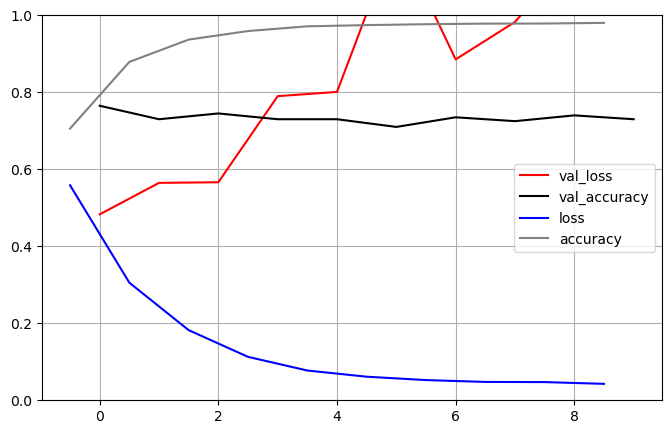

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

colors=[#"blue", "gray", #  loss      accuracy
        "red", "black"] #   val_loss  val_accuracy
                               #df[ ["val_loss","val_accuracy"] ].plot(figsize=(8,5), color=colors)
pd.DataFrame( history.history )[["val_loss","val_accuracy"]].plot(figsize=(8,5), color=colors)

# the validation error is computed at the end of each epoch, while the training error is
# computed using a running mean during each epoch. So the training curve should be shifted by
# half an epoch to the left.
#shift(-0.5)
         #1D array                #list
plt.plot(np.arange(-0.5,9,1), history.history["loss"], c="blue", label="loss")    #must be put after previous code for plotting Dataframe
plt.plot(np.arange(-0.5,9,1), history.history["accuracy"], c="gray", label="accuracy")#must be put after previous code for plotting Dataframe
plt.legend()
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range to [0-1]
plt.show()

In [23]:
scores = model.evaluate(x_pre_tf.toarray(), y_test, verbose=1)
print("Accuracy:", scores[1])

72/72 [==============================] - 2s 32ms/step - loss: 1.3353 - accuracy: 0.7658
Accuracy: 0.7657617926597595


In [24]:
len(tfidf_vect.get_feature_names_out())

5324